# Предсказание стоимости поддержанного автомобиля

**Цели и задачи:**  

Работа проводится с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах. На этих данных будет построена модель классификации, определяющая категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

**Описание датасета:**

- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.

## Подготовка 
Задачи: импорт библиотек и загрузка данных.

In [1]:
# импорт необходимых библиотек 

import os
import pickle

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier

Matplotlib is building the font cache; this may take a moment.


In [2]:
# загрузка данных 

df_out = pd.read_csv(os.path.join('data', 'vehicles_dataset.csv'))
print('Размер датасета df_out:', df_out.shape) 
df_out.head()

Размер датасета df_out: (10050, 27)


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,NaN,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,NaN,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,NaN,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


## Data Preparation

Основные задачи этого блока: 
* удаление дубликатов;
* заполнение пропущенных значений; 
* преобразование типов данных; 
* обработка выбросов. 

In [3]:
# взглянем на данные, с которыми предстоит работать

df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10050 non-null  int64  
 1   url             10050 non-null  object 
 2   region          10050 non-null  object 
 3   region_url      10050 non-null  object 
 4   price           10050 non-null  int64  
 5   year            10014 non-null  float64
 6   manufacturer    9665 non-null   object 
 7   model           9921 non-null   object 
 8   condition       6268 non-null   object 
 9   cylinders       5953 non-null   object 
 10  fuel            9987 non-null   object 
 11  odometer        10007 non-null  float64
 12  title_status    9884 non-null   object 
 13  transmission    10005 non-null  object 
 14  VIN             6086 non-null   object 
 15  drive           7026 non-null   object 
 16  size            2825 non-null   object 
 17  type            7845 non-null  

In [4]:
# целевая переменная в данной работе - price_category 

df_out['price_category'].value_counts(dropna=False)

# она может принимать только три значения: high, medium, low,
# пропущенных значений не имеет;
# причём, так как доли значений входят в выборку примерно одинаково, 
# можно сделать вывод, что целевая переменная распределена нормально.

high      3514
medium    3294
low       3242
Name: price_category, dtype: int64

### Удаление дубликатов

In [5]:
# в первую очередь избавимся от дубликатов, если такие есть 

print('Всего дубликатов:', len(df_out[df_out.duplicated()]))
df_out = df_out.drop_duplicates()

print('Размер df_out после удаления дубликатов:', df_out.shape)

Всего дубликатов: 50
Размер df_out после удаления дубликатов: (10000, 27)


### Заполнение пропущенных значений 

In [6]:
# посмотрим, сколько пропущенных значений в каждой колонке 

missing_values = (100 * df_out.isna().sum() / len(df_out)).sort_values(ascending=False)
print('Количество пропущенных значений (%):')
missing_values

Количество пропущенных значений (%):


county            100.00
size               71.91
cylinders          40.80
VIN                39.38
condition          37.66
drive              30.06
paint_color        29.50
type               21.94
manufacturer        3.82
title_status        1.66
model               1.28
long                0.98
lat                 0.98
fuel                0.63
transmission        0.45
odometer            0.43
year                0.36
posting_date        0.02
image_url           0.02
description         0.02
state               0.00
id                  0.00
url                 0.00
price               0.00
region_url          0.00
region              0.00
price_category      0.00
dtype: float64

In [7]:
# в колонках county, size, cylinders, VIN, condition, drive, paint_color, type
# слишком много пропущенных значений, поэтому удалим их 

to_drop = missing_values[missing_values >= 20].index
df_out = df_out.drop(columns=to_drop)

print('Размер df_out после удаления колонок:', df_out.shape)

Размер df_out после удаления колонок: (10000, 19)


#### Колонка: manufacturer 

In [8]:
# узнаем, сколько пропущено значений и какие значения ещё есть 

df_out['manufacturer'].value_counts(dropna=False)

ford               1638
chevrolet          1293
toyota              779
jeep                490
honda               466
nissan              454
ram                 411
NaN                 382
gmc                 358
bmw                 330
dodge               325
volkswagen          251
mercedes-benz       239
hyundai             225
subaru              210
kia                 200
audi                200
lexus               184
cadillac            183
chrysler            161
acura               150
buick               145
mazda               142
infiniti            117
lincoln             113
mitsubishi           82
mini                 72
volvo                67
pontiac              61
rover                59
jaguar               45
porsche              37
mercury              32
tesla                27
saturn               25
fiat                 23
alfa-romeo           14
ferrari               4
harley-davidson       4
datsun                2
Name: manufacturer, dtype: int64

In [9]:
# посмотрим на строки с пропущенными значениями

df_out[df_out['manufacturer'].isna()].head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970.0,NaN,oldsmobile 442,gas,111111.0,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.0984,-89.2734,2021-04-25T10:10:43-0500,high
66,7310077530,https://hudsonvalley.craigslist.org/cto/d/bloo...,hudson valley,https://hudsonvalley.craigslist.org,5500,1990.0,NaN,Diahatsu,gas,30000.0,clean,manual,https://images.craigslist.org/00T0T_a4VRbx40ea...,1991 Daihatsu hijet 5 speed extended cab....im...,ny,41.5644,-74.4304,2021-04-20T18:30:18-0400,low
182,7315478090,https://sanantonio.craigslist.org/ctd/d/san-an...,san antonio,https://sanantonio.craigslist.org,15990,2016.0,NaN,Scion iM Hatchback 4D,gas,34439.0,clean,other,https://images.craigslist.org/00p0p_cEikZTPxSe...,Carvana is the safer way to buy a car During t...,tx,29.4500,-98.5000,2021-05-01T15:11:11-0500,medium
201,7316027370,https://monterey.craigslist.org/cto/d/salinas-...,monterey bay,https://monterey.craigslist.org,2500,2005.0,NaN,Voltswagon Beetle,gas,112432.0,clean,automatic,https://images.craigslist.org/00A0A_7UAsZkjlwp...,"New Brakes, new serpentine belt, new catalytic...",ca,36.6677,-121.6596,2021-05-02T18:15:46-0700,low
217,7314009784,https://nashville.craigslist.org/ctd/d/greenbr...,nashville,https://nashville.craigslist.org,8000,2007.0,NaN,THOMAS SCHOOL BUS,diesel,147971.0,clean,automatic,https://images.craigslist.org/00n0n_iyUWRaR9Xr...,5.9 CUMMINS DIESEL; 28 Passenger with 2 Rear A...,tn,36.4229,-86.7914,2021-04-28T15:08:19-0500,low


In [10]:
# пропущенных значений NaN - 382, 
# по хорошему, стоило бы обработать колонки model и 
# description, чтобы узнать производителя автомобиля, 
# но для простоты заменим пропуски на 'other'

df_out['manufacturer'] = df_out['manufacturer'].fillna('other')
print('Теперь пропущенных значений в колонке manufacturer:', df_out['manufacturer'].isna().sum())

Теперь пропущенных значений в колонке manufacturer: 0


#### Колонка: odometer 

In [11]:
# узнаем, сколько пропущено значений и какие значения ещё есть 

df_out['odometer'].value_counts(dropna=False)

100000.0    50
NaN         43
1.0         42
180000.0    37
200000.0    37
            ..
32086.0      1
126872.0     1
68967.0      1
124248.0     1
61943.0      1
Name: odometer, Length: 7007, dtype: int64

In [12]:
# пропущенных значений NaN - 43, 
# заменим их на среднее значение колонки

df_out['odometer'] = df_out['odometer'].fillna(int(df_out['odometer'].mean()))
print('Теперь пропущенных значений в колонке odometer:', df_out['odometer'].isna().sum())

Теперь пропущенных значений в колонке odometer: 0


#### Колонка: posting_date 

In [13]:
# узнаем, сколько пропущено значений и какие значения ещё есть 

print('Пропущенных значений в колонке posting_date:', df_out['posting_date'].isna().sum())
df_out['posting_date'].value_counts(dropna=False)

Пропущенных значений в колонке posting_date: 2


2021-04-19T10:00:54-0400    2
2021-04-13T09:11:02-0500    2
2021-04-11T11:11:05-0400    2
2021-04-08T10:06:02-0500    2
2021-04-29T21:11:29-0400    2
                           ..
2021-04-05T18:13:07-0400    1
2021-04-26T13:32:07-0400    1
2021-05-04T14:01:18-0400    1
2021-04-24T11:40:55-0700    1
2021-04-24T13:50:49-0400    1
Name: posting_date, Length: 9958, dtype: int64

In [14]:
# так как в данной колонке всего лишь 2 пропущенных значения (очень мало), 
# и нет достаточно частого значения, которым можно было бы их заменить, 
# лучше всего удалить строки с пропущенными значениями из датасета 

df_out = df_out.drop(df_out[df_out['posting_date'].isna()].index)
print('Теперь пропущенных значений в колонке posting_date:', df_out['posting_date'].isna().sum())
print('А размер обновленного датасета df_out:', df_out.shape)

Теперь пропущенных значений в колонке posting_date: 0
А размер обновленного датасета df_out: (9998, 19)


#### Колонка: transmission

In [15]:
# узнаем, сколько пропущено значений и какие значения ещё есть 

df_out['transmission'].value_counts(dropna=False)

automatic    7700
other        1624
manual        631
NaN            43
Name: transmission, dtype: int64

In [16]:
# пропущенных значений NaN - 43, 
# и их логично заменить на значение 'other'

df_out['transmission'] = df_out['transmission'].fillna('other')
print('Теперь пропущенных значений в колонке transmission:', df_out['transmission'].isna().sum())

Теперь пропущенных значений в колонке transmission: 0


#### Колонки: lat и long

In [17]:
# узнаем, сколько пропущено значений и какие значения ещё есть 

df_out['lat'].value_counts(dropna=False), df_out['long'].value_counts(dropna=False)

(NaN          96
 43.182400    88
 33.779214    79
 40.468785    73
 33.786500    54
              ..
 33.640251     1
 39.942263     1
 34.299800     1
 44.472801     1
 42.123900     1
 Name: lat, Length: 5050, dtype: int64,
  NaN          96
 -84.112200    88
 -84.411811    79
 -74.281707    73
 -84.445400    54
               ..
 -82.527995     1
 -97.031100     1
 -85.806306     1
 -78.625588     1
 -79.189500     1
 Name: long, Length: 5083, dtype: int64)

In [18]:
# в обеих колонках пропущено одинаковое количество значений, 
# убедимся, что пропущены значения колонок в одних и тех же строках

same_rows = df_out[df_out['lat'].isna()].equals(df_out[df_out['long'].isna()])
print('Значения lat и long пропущены в одним и тех же строках:', same_rows)

Значения lat и long пропущены в одним и тех же строках: True


In [19]:
# пропусков в колонках немного, и нет логичного значения для заполнения их, 
# поэтому удалим строки с пропущенными значениями в lat и long

df_out = df_out.drop(df_out[df_out['lat'].isna()].index)
print('Теперь пропущенных значений в колонке lat:', df_out['lat'].isna().sum())
print('Теперь пропущенных значений в колонке long:', df_out['long'].isna().sum())
print('А размер обновленного датасета df_out:', df_out.shape)

Теперь пропущенных значений в колонке lat: 0
Теперь пропущенных значений в колонке long: 0
А размер обновленного датасета df_out: (9902, 19)


#### Колонка: year

In [20]:
# узнаем, сколько пропущено значений и какие значения ещё есть 

print('Пропущенных значений в колонке year:', df_out['year'].isna().sum())
df_out['year'].value_counts(dropna=False)

Пропущенных значений в колонке year: 34


2017.0    808
2018.0    799
2016.0    733
2013.0    685
2015.0    664
         ... 
1927.0      1
1958.0      1
1941.0      1
1935.0      1
1954.0      1
Name: year, Length: 90, dtype: int64

In [21]:
# пропущенных значений мало - 34, 
# проще всего просто удалить строки с этими пропусками

df_out = df_out.drop(df_out[df_out['year'].isna()].index)
print('Теперь пропущенных значений в колонке year:', df_out['year'].isna().sum())
print('А размер обновленного датасета df_out:', df_out.shape)

Теперь пропущенных значений в колонке year: 0
А размер обновленного датасета df_out: (9868, 19)


#### Колонка: fuel

In [22]:
# узнаем, сколько пропущено значений и какие значения ещё есть 

print('Пропущенных значений в колонке fuel:', df_out['fuel'].isna().sum())
df_out['fuel'].value_counts(dropna=False)

Пропущенных значений в колонке fuel: 54


gas         8298
other        725
diesel       643
hybrid       104
NaN           54
electric      44
Name: fuel, dtype: int64

In [23]:
# пропущенных значений NaN - 54, 
# и их логично заменить на значение 'other'

df_out['fuel'] = df_out['fuel'].fillna('other')
print('Теперь пропущенных значений в колонке fuel:', df_out['fuel'].isna().sum())

Теперь пропущенных значений в колонке fuel: 0


#### Колонка: model

In [24]:
# узнаем, сколько пропущено значений и какие значения ещё есть 

print('Пропущенных значений в колонке model:', df_out['model'].isna().sum())
df_out['model'].value_counts(dropna=False)

Пропущенных значений в колонке model: 126


f-150                        148
NaN                          126
silverado 1500               106
1500                         100
camry                         76
                            ... 
sorrento lx v6                 1
sierra1500 crewcab 4x4         1
corolla se                     1
xc60 t6 inscription sport      1
a3 2.0t premium plus pzev      1
Name: model, Length: 3438, dtype: int64

In [25]:
# распечатаем строки с отсутствующим значением model

df_out[df_out['model'].isna()].head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005.0,rover,NaN,gas,165206.0,clean,automatic,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low
142,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006.0,jeep,NaN,gas,132000.0,clean,automatic,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low
151,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007.0,gmc,NaN,gas,190000.0,clean,automatic,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low
200,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012.0,ram,NaN,gas,121371.0,clean,automatic,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium
251,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007.0,ram,NaN,diesel,220019.0,clean,automatic,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium


In [26]:
# пропущенных значений - 126, 
# в некоторых случаях модель авто можно было бы взять из описания
# но для простоты заменим пропуски на значение 'other'

df_out['model'] = df_out['model'].fillna('other')
print('Теперь пропущенных значений в колонке model:', df_out['model'].isna().sum())

Теперь пропущенных значений в колонке model: 0


#### Колонка: title_status

In [27]:
# узнаем, сколько пропущено значений и какие значения ещё есть 

print('Пропущенных значений в колонке title_status:', df_out['title_status'].isna().sum())
df_out['title_status'].value_counts(dropna=False)

Пропущенных значений в колонке title_status: 159


clean         9397
rebuilt        168
NaN            159
salvage         91
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [28]:
# пропущенных значений - 159, 
# в данном случае логично и просто 
# заменить их на самое популярное значение clean

most_popular = df_out['title_status'].mode()[0]
df_out['title_status'] = df_out['title_status'].fillna(most_popular)
print('Теперь пропущенных значений в колонке title_status:', df_out['title_status'].isna().sum())

Теперь пропущенных значений в колонке title_status: 0


In [29]:
# убедимся, что пропущенных значений больше нет

missing_values = (100 * df_out.isna().sum() / len(df_out)).sort_values(ascending=False)
print('Количество пропущенных значений (%):')
missing_values

Количество пропущенных значений (%):


id                0.0
title_status      0.0
posting_date      0.0
long              0.0
lat               0.0
state             0.0
description       0.0
image_url         0.0
transmission      0.0
odometer          0.0
url               0.0
fuel              0.0
model             0.0
manufacturer      0.0
year              0.0
price             0.0
region_url        0.0
region            0.0
price_category    0.0
dtype: float64

### Преобразование типов данных 

In [30]:
# посмотрим, какие типы данных стоит изменить

df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 10049
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9868 non-null   int64  
 1   url             9868 non-null   object 
 2   region          9868 non-null   object 
 3   region_url      9868 non-null   object 
 4   price           9868 non-null   int64  
 5   year            9868 non-null   float64
 6   manufacturer    9868 non-null   object 
 7   model           9868 non-null   object 
 8   fuel            9868 non-null   object 
 9   odometer        9868 non-null   float64
 10  title_status    9868 non-null   object 
 11  transmission    9868 non-null   object 
 12  image_url       9868 non-null   object 
 13  description     9868 non-null   object 
 14  state           9868 non-null   object 
 15  lat             9868 non-null   float64
 16  long            9868 non-null   float64
 17  posting_date    9868 non-null   

In [31]:
df_out.describe(include='all')

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
count,9.868000e+03,9868,9868,9868,9.868000e+03,9868.000000,9868,9868,9868,9.868000e+03,9868,9868,9868,9868,9868,9868.000000,9868.000000,9868,9868
unique,NaN,9868,393,405,NaN,NaN,40,3438,5,NaN,6,3,8968,9718,51,NaN,NaN,9828,3
top,NaN,https://chattanooga.craigslist.org/ctd/d/chatt...,"kansas city, MO",https://kansascity.craigslist.org,NaN,NaN,ford,f-150,gas,NaN,clean,automatic,https://images.craigslist.org/00N0N_1xMPvfxRAI...,PLEASE VIEW THE FREE CARFAX HISTORY REPORT AT ...,ca,NaN,NaN,2021-04-11T10:51:21-0400,high
freq,NaN,1,86,86,NaN,NaN,1626,148,8298,NaN,9556,7577,188,7,1106,NaN,NaN,2,3429
mean,7.311555e+09,NaN,NaN,NaN,2.060201e+04,2010.909708,NaN,NaN,NaN,9.602918e+04,NaN,NaN,NaN,NaN,NaN,38.602746,-94.138420,NaN,NaN
std,4.362736e+06,NaN,NaN,NaN,1.254372e+05,9.705988,NaN,NaN,NaN,8.679010e+04,NaN,NaN,NaN,NaN,NaN,5.845693,18.133258,NaN,NaN
min,7.301586e+09,NaN,NaN,NaN,5.000000e+02,1915.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,-67.144243,-158.069300,NaN,NaN
25%,7.308182e+09,NaN,NaN,NaN,7.800000e+03,2008.000000,NaN,NaN,NaN,3.925250e+04,NaN,NaN,NaN,NaN,NaN,34.862900,-110.199536,NaN,NaN
50%,7.312775e+09,NaN,NaN,NaN,1.559000e+04,2013.000000,NaN,NaN,NaN,8.911600e+04,NaN,NaN,NaN,NaN,NaN,39.300000,-87.980000,NaN,NaN
75%,7.315284e+09,NaN,NaN,NaN,2.799000e+04,2017.000000,NaN,NaN,NaN,1.371982e+05,NaN,NaN,NaN,NaN,NaN,42.440000,-80.829973,NaN,NaN


In [32]:
df_out.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442.0,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,other,60023.0,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048.0,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291.0,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000.0,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


In [33]:
# колонка: odometer
# значения данной колонки в большинстве 
# своём принимают целочисленные значения 
# поэтому лучше привести колонку к типу int

df_out['odometer'] = df_out['odometer'].astype('int64')
print('Новый тип колонки odometer:', df_out['odometer'].dtype)

Новый тип колонки odometer: int64


In [34]:
# колонка: posting_date
# приведём колонку к временному типу, 
# чтобы можно было выполнять специализированные операции
# на всякий случай сохранить дату в новой колонке

df_out['posting_date'] = pd.to_datetime(df_out['posting_date'], utc=True)
print('Новый тип колонки posting_date:', df_out['posting_date'].dtype)

Новый тип колонки posting_date: datetime64[ns, UTC]


In [35]:
# колонка: year
# значения данной колонки принимают целочисленные значения 
# поэтому лучше привести колонку к типу int

df_out['year'] = df_out['year'].astype('int64')
print('Новый тип колонки year:', df_out['year'].dtype)

Новый тип колонки year: int64


In [36]:
# посмотрим, что вышло 

df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 10049
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9868 non-null   int64              
 1   url             9868 non-null   object             
 2   region          9868 non-null   object             
 3   region_url      9868 non-null   object             
 4   price           9868 non-null   int64              
 5   year            9868 non-null   int64              
 6   manufacturer    9868 non-null   object             
 7   model           9868 non-null   object             
 8   fuel            9868 non-null   object             
 9   odometer        9868 non-null   int64              
 10  title_status    9868 non-null   object             
 11  transmission    9868 non-null   object             
 12  image_url       9868 non-null   object             
 13  description     9868 non-null   

### Обработка выбросов 

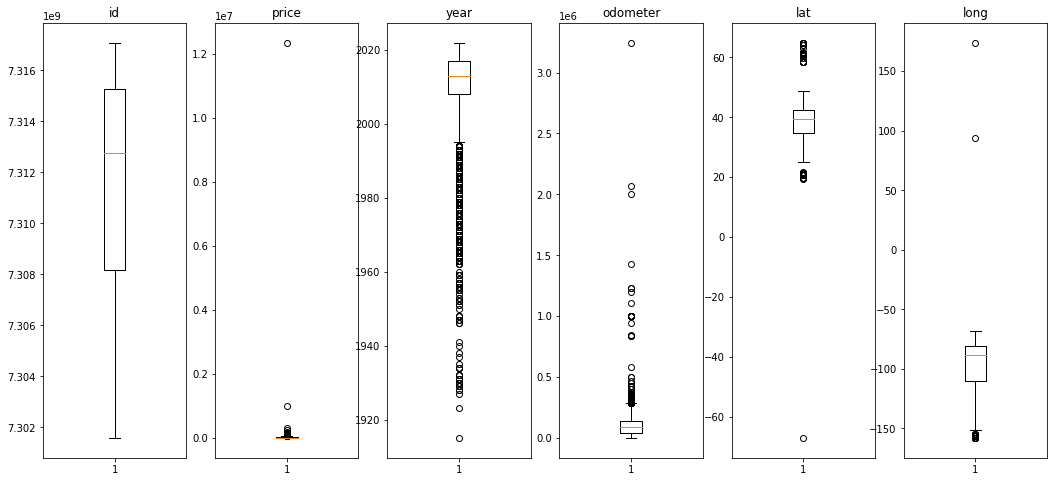

In [37]:
# с помощью графиков посмотрим на аномалии в численных колонках 

numeric_columns = df_out.select_dtypes(['int', 'float']).columns
n_cols = len(numeric_columns)

fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols*3, 8))
for ax, col in zip(axes, numeric_columns):
    ax.boxplot(df_out[col])
    ax.set_title(col)
plt.show()

In [38]:
# введем функцию для нахождения интерквартильного размаха
# с помощью которого будем ограничивать аномалии

def get_iqr_boundaries(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    return (q25 - 1.5 * (q75 - q25), 
            q75 + 1.5 * (q75 - q25))

In [39]:
# колонки lat и long оставим как есть

#### Колонка: odometer

In [40]:
# посмотрим на данные

iqr_boundaries = get_iqr_boundaries(df_out['odometer'])
is_outlier = (df_out['odometer'] < iqr_boundaries[0]) | (df_out['odometer'] > iqr_boundaries[1])

print('Границы интерквартильного размаха для odometer:', iqr_boundaries)
print(f'Количество выбросов: {is_outlier.sum()} ({100 * is_outlier.sum() / len(df_out) :0.2f}%)')
df_out['odometer'].describe().apply(lambda x: f'{x:0.3f}')

Границы интерквартильного размаха для odometer: (-107666.125, 284116.875)
Количество выбросов: 90 (0.91%)


count       9868.000
mean       96029.179
std        86790.099
min            0.000
25%        39252.500
50%        89116.000
75%       137198.250
max      3245000.000
Name: odometer, dtype: object

In [41]:
# из данных видно, что все выбросы находятся выше интерквартильного размаха
# изменим их значение на максимум iqr

df_out.loc[is_outlier, 'odometer'] = int(iqr_boundaries[1])
print('Теперь количество выбросов в odometer:', (df_out['odometer'] > iqr_boundaries[1]).sum())

Теперь количество выбросов в odometer: 0


#### Колонка: year

In [42]:
# посмотрим на данные

iqr_boundaries = get_iqr_boundaries(df_out['year'])
is_outlier = (df_out['year'] < iqr_boundaries[0]) | (df_out['year'] > iqr_boundaries[1])

print('Границы интерквартильного размаха для year:', iqr_boundaries)
print(f'Количество выбросов: {is_outlier.sum()} ({100 * is_outlier.sum() / len(df_out) :0.2f}%)')
df_out['year'].describe()

Границы интерквартильного размаха для year: (1994.5, 2030.5)
Количество выбросов: 394 (3.99%)


count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [43]:
# из данных видно, что все выбросы находятся ниже интерквартильного размаха
# изменим их значение на минимум iqr

df_out.loc[is_outlier, 'year'] = int(iqr_boundaries[0]) + 1
print('Теперь количество выбросов в year:', (df_out['year'] < iqr_boundaries[0]).sum())

Теперь количество выбросов в year: 0


In [44]:
# посмотрим на количество автомобилей по годам

df_out.groupby(['year'])[['id']].count().rename(columns={'id': 'count'})

,count
year,
1995,427
1996,25
1997,44
1998,55
1999,81
2000,79
2001,122
2002,149
2003,185


In [45]:
# из таблицы видно, что автомобилей, произведенных 
# в 2021-2022 годах слишком мало, чтобы их нормально анализировать
# поэтому удалим их из датасета

df_out = df_out[df_out['year'] < 2021]
print('Новый размер df_out:', df_out.shape)

Новый размер df_out: (9817, 19)


#### Колонка: price

In [46]:
# посмотрим на данные

iqr_boundaries = get_iqr_boundaries(df_out['price'])
is_outlier = (df_out['price'] < iqr_boundaries[0]) | (df_out['price'] > iqr_boundaries[1])

print('Границы интерквартильного размаха для price:', iqr_boundaries)
print(f'Количество выбросов: {is_outlier.sum()} ({100 * is_outlier.sum() / len(df_out) :0.2f}%)')
df_out['price'].describe().apply(lambda x: f'{x:0.3f}')

Границы интерквартильного размаха для price: (-22485.0, 58275.0)
Количество выбросов: 198 (2.02%)


count        9817.000
mean        20416.479
std        125323.235
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

In [47]:
# посмотрим, описывают ли аномалии что-то особое в данных

df_out[is_outlier].sort_values('price')

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
6080,7310551940,https://cincinnati.craigslist.org/ctd/d/camp-d...,cincinnati,https://cincinnati.craigslist.org,58500,2019,chevrolet,"silverado 2500hd 4wd crew cab 153.7"" ltz",other,50930,clean,automatic,https://images.craigslist.org/01010_ldls5xr3zz...,***Call Us for more information at: 513-453-41...,oh,39.171991,-84.271999,2021-04-21 21:05:31+00:00,high
4867,7308933629,https://omaha.craigslist.org/cto/d/cortland-20...,omaha / council bluffs,https://omaha.craigslist.org,58500,2008,chevrolet,corvette,gas,11000,clean,manual,https://images.craigslist.org/00P0P_kxzGxZwBY9...,2008 Corvette Z06 Wil Cooksey Edition Car nu...,ia,40.445488,-96.713695,2021-04-18 20:53:04+00:00,high
946,7312212565,https://lasvegas.craigslist.org/cto/d/fresno-d...,las vegas,https://lasvegas.craigslist.org,58500,2013,ram,3500 limited,diesel,57149,clean,automatic,https://images.craigslist.org/00o0o_6VEbwgYoL0...,Only 57K Miles! This 3500 RAM Truck has the 6....,nv,36.746400,-119.639700,2021-04-25 03:46:06+00:00,high
8195,7307146509,https://lubbock.craigslist.org/ctd/d/brownfiel...,lubbock,https://lubbock.craigslist.org,58600,2019,ford,f-150,gas,29458,clean,automatic,https://images.craigslist.org/00E0E_6JF7CBAVf7...,Stanley CDJR Brownfield address: 1706 Lubbo...,tx,33.196047,-102.273565,2021-04-15 13:58:48+00:00,high
4339,7313452917,https://austin.craigslist.org/ctd/d/salem-2016...,austin,https://austin.craigslist.org,58670,2016,chevrolet,other,other,16407,clean,automatic,https://images.craigslist.org/00000_e7iiMwUVq3...,2016 *** Chevrolet Corvette 2LZ Z06*** ...,tx,44.927304,-123.030322,2021-04-27 18:33:32+00:00,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,7313664504,https://austin.craigslist.org/cto/d/austin-sup...,austin,https://austin.craigslist.org,150000,2006,other,Peterbilt 378,diesel,1234,clean,manual,https://images.craigslist.org/00v0v_ejAvqrK3iP...,Selling a Wonderful Super Dump! 2006 Peterbilt...,tx,30.364900,-97.682700,2021-04-28 02:01:28+00:00,high
9204,7306718413,https://desmoines.craigslist.org/ctd/d/portlan...,des moines,https://desmoines.craigslist.org,163540,2020,mercedes-benz,other,other,6318,clean,automatic,https://images.craigslist.org/00y0y_i26NvL7pZC...,2020 *** Mercedes-Benz G-Class G63 AMG*** ...,ia,45.494265,-122.579192,2021-04-14 16:26:24+00:00,high
6141,7315323093,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,197999,2015,other,Lamborghini Huracan,gas,33875,clean,other,https://images.craigslist.org/01717_55Ai9omMq5...,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl,28.466088,-81.396429,2021-05-01 15:48:44+00:00,high
292,7310897583,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,239995,2017,ferrari,488 gtb,gas,6012,clean,automatic,https://images.craigslist.org/00t0t_dN5Wr8nfOx...,2017 Ferrari 488 GTB Coupe2017 Ferrari 488 GTB...,az,32.236075,-110.878886,2021-04-22 16:38:59+00:00,high


In [48]:
# среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, 
# высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом
# но для простоты удалим все аномальные объекты из данных

df_out = df_out.drop(df_out[is_outlier].index)
is_outlier = (df_out['price'] < iqr_boundaries[0]) | (df_out['price'] > iqr_boundaries[1])
print('Теперь количество выбросов в price:', (df_out['price'] < iqr_boundaries[0]).sum())
print('Новый размер датасета df_out:', df_out.shape)

Теперь количество выбросов в price: 0
Новый размер датасета df_out: (9619, 19)


## Feature Engineering 
Основные задачи этого блока: 
* генерация новых признаков; 
* нормализация численных признаков; 
* кодирование категориальных признаков; 
* окончательная подготовка датасета.

In [49]:
# ещё раз посмотрим, какие данные имеются

df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9619 entries, 0 to 10049
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9619 non-null   int64              
 1   url             9619 non-null   object             
 2   region          9619 non-null   object             
 3   region_url      9619 non-null   object             
 4   price           9619 non-null   int64              
 5   year            9619 non-null   int64              
 6   manufacturer    9619 non-null   object             
 7   model           9619 non-null   object             
 8   fuel            9619 non-null   object             
 9   odometer        9619 non-null   int64              
 10  title_status    9619 non-null   object             
 11  transmission    9619 non-null   object             
 12  image_url       9619 non-null   object             
 13  description     9619 non-null   

### Генерация новых признаков

In [50]:
# укороченное значение модели (так как кол-во моделей велико) 

df_out['short_model'] = df_out['model'].apply(lambda x: x.split()[0])

In [51]:
# возраст авто по категориям

choose_func = lambda x: ['old', 'average', 'new'][int(x.year >= 2006) + int(x.year > 2013)]
df_out['age_category'] = df_out.apply(choose_func, axis=1)

In [52]:
# числовые признаки для модели и описания

df_out['desc_len'] = df_out.apply(lambda x: len(x.description), axis=1)
df_out['model_in_desc'] = df_out.apply(lambda x: x.description.count(x.model), axis=1)
df_out['model_len'] = df_out['model'].apply(lambda x: len(x))
df_out['model_word_count'] = df_out['model'].apply(lambda x: len(x.split()))

In [53]:
# признаки даты объявления

df_out['month'] = df_out['posting_date'].dt.month
df_out['dayofweek'] = df_out['posting_date'].dt.dayofweek
df_out['diff_years'] = df_out['posting_date'].dt.year - df_out['year']

In [54]:
# посмотрим теперь какие данные есть

df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9619 entries, 0 to 10049
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                9619 non-null   int64              
 1   url               9619 non-null   object             
 2   region            9619 non-null   object             
 3   region_url        9619 non-null   object             
 4   price             9619 non-null   int64              
 5   year              9619 non-null   int64              
 6   manufacturer      9619 non-null   object             
 7   model             9619 non-null   object             
 8   fuel              9619 non-null   object             
 9   odometer          9619 non-null   int64              
 10  title_status      9619 non-null   object             
 11  transmission      9619 non-null   object             
 12  image_url         9619 non-null   object             
 13  de

### Стандартизация числовых признаков

In [55]:
# посмотрим на признаки, которые можно нормализировать

df_out.describe()

,id,price,year,odometer,lat,long,desc_len,model_in_desc,model_len,model_word_count,month,dayofweek,diff_years
count,9.619000e+03,9619.000000,9619.000000,9619.000000,9619.000000,9619.000000,9619.000000,9619.000000,9619.000000,9619.000000,9619.000000,9619.000000,9619.000000
mean,7.311568e+09,18014.652771,2011.555879,95167.485393,38.602095,-93.896875,2745.205115,0.369581,11.928059,2.168729,4.274977,2.755172,9.444121
std,4.358556e+06,12498.618213,6.385814,62749.705910,5.720989,17.857352,2747.910831,2.372451,8.660519,1.481611,0.446526,2.003906,6.385814
min,7.301586e+09,500.000000,1995.000000,0.000000,19.541726,-158.069300,4.000000,0.000000,1.000000,1.000000,4.000000,0.000000,1.000000
25%,7.308208e+09,7500.000000,2008.000000,40784.000000,34.920000,-106.944340,502.500000,0.000000,6.000000,1.000000,4.000000,1.000000,4.000000
50%,7.312785e+09,15000.000000,2013.000000,91000.000000,39.300000,-87.845800,2149.000000,0.000000,9.000000,2.000000,4.000000,3.000000,8.000000
75%,7.315287e+09,26990.000000,2017.000000,138594.500000,42.382100,-80.678711,4235.000000,0.000000,17.000000,3.000000,5.000000,4.000000,13.000000
max,7.317090e+09,57999.000000,2020.000000,284116.000000,64.947500,94.163200,26777.000000,63.000000,187.000000,29.000000,5.000000,6.000000,26.000000


In [56]:
# выберем и нормализуем необходимые признаки

num_cols = ['year', 'odometer', 'lat', 'long', 'desc_len', 'model_in_desc', 'model_len', 
            'model_word_count', 'month', 'dayofweek', 'diff_years']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_out[num_cols])

new_names = [old + '_std' for old in num_cols]
df_out[new_names] = scaled_data

### Кодирование категориальных признаков

In [57]:
# посмотрим на признаки, которые можно закодировать с помощью one-hot метода

df_out.select_dtypes('object').describe()

,url,region,region_url,manufacturer,model,fuel,title_status,transmission,image_url,description,state,price_category,short_model,age_category
count,9619,9619,9619,9619,9619,9619,9619,9619,9619,9619,9619,9619,9619,9619
unique,9619,393,405,40,3341,5,6,3,8733,9477,51,3,943,3
top,https://chattanooga.craigslist.org/ctd/d/chatt...,"kansas city, MO",https://kansascity.craigslist.org,ford,f-150,gas,clean,automatic,https://images.craigslist.org/00N0N_1xMPvfxRAI...,PLEASE VIEW THE FREE CARFAX HISTORY REPORT AT ...,ca,medium,silverado,new
freq,1,86,86,1561,145,8179,9314,7363,188,7,1073,3220,392,4486


In [58]:
# выберем и закодируем только признаки с небольшим кол-вом уникальных значений

cat_cols = ['region', 'manufacturer', 'fuel', 'title_status', 'transmission', 'state', 'short_model', 'age_category']

ohe = OneHotEncoder(sparse=False)
ohe_data = ohe.fit_transform(df_out[cat_cols])

df_out[ohe.get_feature_names()] = ohe_data

/home/kolkingen/Projects/ds-car-prices/.venv/lib64/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/tmp/ipykernel_7407/2756897648.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_out[ohe.get_feature_names()] = ohe_data
/tmp/ipykernel_7407/2756897648.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ou

### Подготовка датасета

In [59]:
# удалим ненужные колонки из датасета

to_drop = num_cols + cat_cols + ['url', 'region_url', 'model', 'image_url', 
                                 'description', 'posting_date']
df_out = df_out.drop(columns=to_drop)

print('Новый размер датасета df_out', df_out.shape)

Новый размер датасета df_out (9619, 1458)


In [60]:
# обучим линейную регрессии для предсказания цены price 
# это необходимо, чтобы понять, какие признаки в датасете самые важные

x_lin, y_lin = df_out.drop(columns=['price_category', 'price']), df_out['price']
linreg = LinearRegression().fit(x_lin, y_lin)

coefs = pd.Series(linreg.coef_, index=x_lin.columns)
most_important_features = abs(coefs).sort_values(ascending=False)[:1000].index

df_out = df_out[list(most_important_features) + ['price_category']]
print('Новый размер датасета df_out', df_out.shape)

Новый размер датасета df_out (9619, 1001)


In [61]:
# сохраним финальный датасет в отдельный файл

df_out.to_csv(os.path.join('data', 'final_dataset.csv'), index=False)

## Modeling
Основная задача этого блока - обучение нескольких моделей на обработанном датасете.

In [62]:
# отделим целевую переменную от датасета 

x = df_out.drop(columns=['price_category']).values
y = df_out['price_category'].values

In [63]:
# разделим данные на тренировочную и тестовую выборки

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=42)
print(f'x_train.shape = {x_train.shape}, x_test.shape = {x_test.shape}')
print(f'y_train.shape = {y_train.shape}, y_test.shape = {y_test.shape}')

x_train.shape = (7695, 1000), x_test.shape = (1924, 1000)
y_train.shape = (7695,), y_test.shape = (1924,)


In [64]:
# обучим логистическую регрессию 

logreg = LogisticRegression(C=50.0, max_iter=1000, random_state=42) 
cv_results = cross_val_score(logreg, x_train, y_train, cv=5)

print('Результаты кросс-валидации для логистической регрессии:')
print(f'mean = {cv_results.mean()}, std = {cv_results.std()}')

/home/kolkingen/Projects/ds-car-prices/.venv/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Результаты кросс-валидации для логистической регрессии:
mean = 0.7092917478882391, std = 0.013025306836466107


In [65]:
# обучим случайный лес 

forest = RandomForestClassifier(n_estimators=200, random_state=42) 
cv_results = cross_val_score(forest, x_train, y_train, cv=5)

print('Результаты кросс-валидации для случайного леса:')
print(f'mean = {cv_results.mean()}, std = {cv_results.std()}')

Результаты кросс-валидации для случайного леса:
mean = 0.7361923326835608, std = 0.008649544531406754


In [66]:
# обучим многослойный персептрон

mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 20), early_stopping=True, 
                    max_iter=1000, random_state=42)
cv_results = cross_val_score(mlp, x_train, y_train, cv=5)

print('Результаты кросс-валидации для многослойного персептрона:')
print(f'mean = {cv_results.mean()}, std = {cv_results.std()}')

Результаты кросс-валидации для многослойного персептрона:
mean = 0.750877192982456, std = 0.009102383889714055


In [67]:
# по результатам кросс-валидации лучшей моделью 
# оказалась модель многослойного персептрона

final_model = mlp
final_model.fit(x_train, y_train)

print('Точность модели на тренировочной выборке:', 
      accuracy_score(y_train, final_model.predict(x_train)))
print('Точность модели на тестовой выборке:', 
      accuracy_score(y_test, final_model.predict(x_test)))
print('Матрица ошибок для тестовой выборки:\n', 
      confusion_matrix(y_test, final_model.predict(x_test)))

Точность модели на тренировочной выборке: 0.8114359974009097
Точность модели на тестовой выборке: 0.760914760914761
Матрица ошибок для тестовой выборки:
 [[550  31  85]
 [ 10 527  97]
 [120 117 387]]


In [68]:
# разница в точности на тренировочной и тестовой выборках 
# не такая уж большая, модель не переобучилась

## Results

In [69]:
# лучшей моделью оказалась модель многослойного персептрона 
# обучим её на всём датасете

final_model.fit(x, y)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50, 20),
              max_iter=1000, random_state=42)

In [70]:
# сохраним обученную модель в pickle

filename = os.path.join('data', 'final_model.pickle')
with open(filename, 'wb') as file:
    pickle.dump(final_model, file)